2022-03-31 Ludovico Massaccesi

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Frequentist interval estimation
Take a Poisson and compute the lower, upper, and central limits for $n=0,\dots,10$.

In [2]:
# Define the Poisson PMF and CDF

def pmf(n, mu):
    """Poisson PMF."""
    return np.exp(-mu) * mu**n / factorial(n)

def cdf(nmin, nmax, mu):
    """Computes the sum of pmf(n,mu) for n in [nmin,nmax]."""
    return np.sum(pmf(np.arange(nmin, nmax+1), mu))

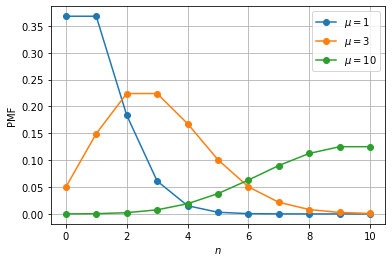

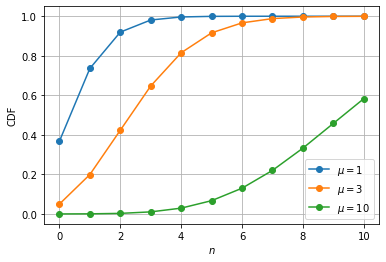

In [3]:
# Check that I wrote them correctly
n = np.arange(11)

plt.figure()
for mu in [1, 3, 10]:
    plt.plot(n, pmf(n, mu), 'o-', label=fr"$\mu={mu:g}$")
plt.grid()
plt.legend()
plt.xlabel("$n$")
plt.ylabel("PMF")
plt.show()

plt.figure()
for mu in [1, 3, 10]:
    plt.plot(n, [cdf(0, i, mu) for i in n], 'o-', label=fr"$\mu={mu:g}$")
plt.grid()
plt.legend()
plt.xlabel("$n$")
plt.ylabel("CDF")
plt.show()

Neyman's bands are defined by requiring that
$$C(\mu)=\sum_{n:o(n)<c}p(n;\mu)\geq CL$$
and solving for $c$, for each value of $\mu$.
The ordering function $o(n)$ is defined by:

1. $o(n)=n$ (sort by $n$ ascending) for the lower limit;
2. $o(n)=-n$ (sort by $n$ descending) for the upper limit;
3. $o(n)=|C(n;\mu)-\frac{1}{2}|$ (sort by distance from the point with cumulant $1/2$ ascending) for the central limit;
4. $o(n)=-P(n;\mu)$ (sort by PMF descending) for the P-ordering limit.

Applying this metod directly requires repeating the procedure for a large number of values of $\mu$ in order to obtain high precision limits.
However, this rapidly becomes very computationally expensive as the required precision increases.

Since, in a real case, $n$ will be fixed by the observation (and, in this exercise, $n$ assumes only a limited number of values), one might try to reverse the problem by fixing the last $n$ that will be included in the band (in the order given by $o$), and solve $C(\mu)=CL$ for $\mu$ numerically.

In [4]:
def find_root(f, x1, x2, precision=1e-7):
    """Finds x such that f(x) == 0 within precision,
    using the bisection method in the interval [x1,x2]."""
    if f(x1) == 0 or f(x2) == 0:
        print("INFO One of the extrema is a root.")
        return x1 if f(x1) == 0 else x2
    if f(x1) * f(x2) > 0:
        print("ERROR The function has the same sign at the extrema.")
        return np.nan
    while x2-x1 > precision:
        x = (x1 + x2) / 2
        fc = f(x)
        if fc == 0:
            break  # Root found
        if f(x1) * fc < 0:
            x2 = x
        else:
            x1 = x
    return x